# Financial EDA with External Data Integration – S&P 500 Focus

**Author:** Ellis Jardine  
**Date:** January 21, 2026  
**Location:** Madrid, Spain  

This notebook performs an Exploratory Data Analysis (EDA) on NVIDIA (NVDA) stock prices, a key component of the S&P 500 index.  
We integrate external data (USD/EUR exchange rate) using the `yfinance` library to analyze potential currency impact from a European perspective.

In [5]:
import sys
print(sys.executable)
import sys
!{sys.executable} -m pip install pandas matplotlib seaborn yfinance



c:\Users\azarc\AppData\Local\Programs\Python\Python310\python.exe
Using legacy 'setup.py install' for multitasking, since package 'wheel' is not installed.
    Running setup.py install for multitasking: started
    Running setup.py install for multitasking: finished with status 'done'


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'c:\Users\azarc\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from datetime import datetime

# Set plot style
%matplotlib inline
sns.set(style="whitegrid")

## 1. Load Main Dataset: NVIDIA (NVDA) Historical Prices

NVIDIA is one of the top performers and most influential stocks in the S&P 500, driven by AI and semiconductor demand.

In [14]:
# Define ticker and date range
ticker = 'NVDA'          # NVIDIA - major S&P 500 component
start_date = '2025-01-01'
end_date = datetime.now().strftime('%Y-%m-%d')  # Today (2026-01-21)

# Download data
df = yf.download(ticker, start=start_date, end=end_date)

# Keep only useful columns and rename
df = df[['Close', 'Volume']].reset_index()
df.columns = ['date', 'close_price', 'volume']

print("First 10 rows of NVDA stock data:")
from IPython.display import display

# Optional: Save to CSV for reference
df.to_csv('nvda_stock_data.csv', index=False)

[*********************100%***********************]  1 of 1 completed

First 10 rows of NVDA stock data:


## 2. Basic Initial EDA

Statistical summary of NVDA data:


,date,close_price,volume
count,262,262.000000,2.620000e+02
mean,2025-07-12 07:36:10.992366336,155.340758,2.184279e+08
min,2025-01-02 00:00:00,94.292885,6.552850e+07
25%,2025-04-08 06:00:00,131.139133,1.590202e+08
50%,2025-07-14 12:00:00,165.951408,1.933940e+08
75%,2025-10-14 18:00:00,181.539707,2.462493e+08
max,2026-01-20 00:00:00,207.028473,8.188309e+08
std,NaN,29.839951,9.283136e+07


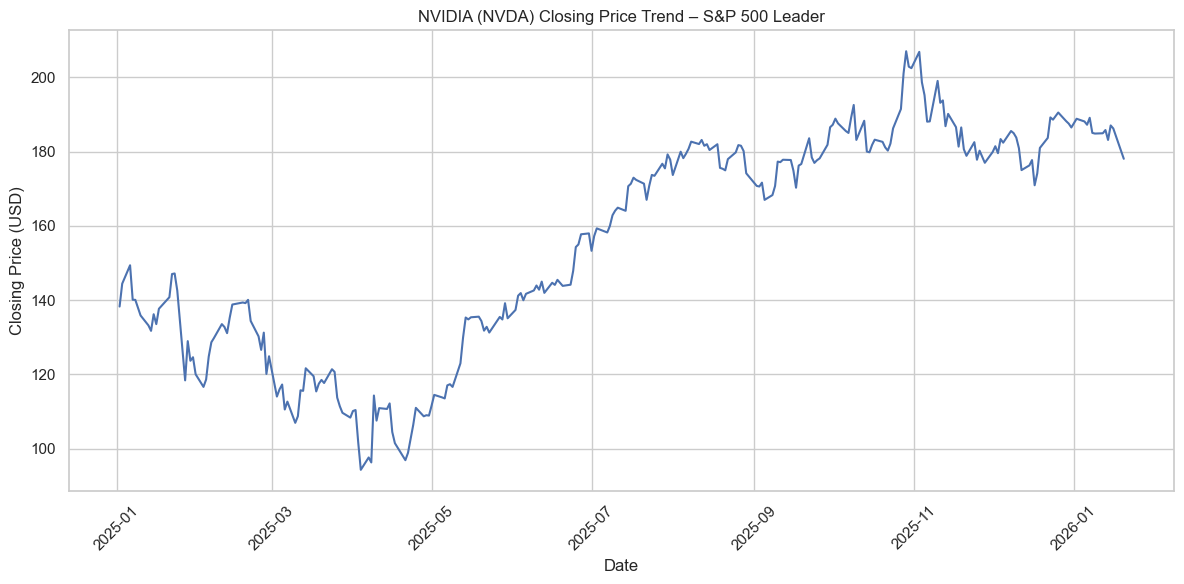

Daily return volatility (std): 0.0308


In [15]:
# Statistical summary
print("Statistical summary of NVDA data:")
display(df.describe())

# Price trend plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='close_price', data=df)
plt.title('NVIDIA (NVDA) Closing Price Trend – S&P 500 Leader')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Daily returns and volatility
df['daily_return'] = df['close_price'].pct_change()
print(f"Daily return volatility (std): {df['daily_return'].std():.4f}")

## 3. Integrate External Data: USD/EUR Exchange Rate

We add the USD/EUR rate to see how currency fluctuations might affect the perceived value of NVDA shares from a European (Eurozone) investor perspective.

In [16]:
# Download EUR/USD (then invert to get USD/EUR)
eur_usd_df = yf.download('EURUSD=X', start=start_date, end=end_date)['Close'].reset_index()
eur_usd_df.columns = ['date', 'eur_usd']

# Calculate USD/EUR (how many EUR per 1 USD)
eur_usd_df['usd_eur'] = 1 / eur_usd_df['eur_usd']

# Merge with main dataframe
df_integrated = pd.merge(df, eur_usd_df[['date', 'usd_eur']], on='date', how='inner')

print("Integrated dataset (NVDA + USD/EUR):")
display(df_integrated.head(10))

[*********************100%***********************]  1 of 1 completed

Integrated dataset (NVDA + USD/EUR):


,date,close_price,volume,daily_return,usd_eur
0,2025-01-02,138.272171,198247200,NaN,0.96601
1,2025-01-03,144.430496,229322500,0.044538,0.97388
2,2025-01-06,149.389130,265377400,0.034332,0.97037
3,2025-01-07,140.101669,351782200,-0.062170,0.96280
4,2025-01-08,140.071701,227349900,-0.000214,0.96660
5,2025-01-10,135.872849,207602500,-0.029976,0.97110
6,2025-01-13,133.193573,204808900,-0.019719,0.97614
7,2025-01-14,131.723969,195590500,-0.011034,0.97416
8,2025-01-15,136.202759,185217300,0.034001,0.97023
9,2025-01-16,133.533478,209235600,-0.019598,0.97132


## 4. Data Cleaning and Advanced EDA :P

Description after integration:


,date,close_price,volume,daily_return,usd_eur
count,260,260.000000,2.600000e+02,260.000000,260.000000
mean,2025-07-13 08:51:41.538461440,155.631207,2.182360e+08,0.001622,0.884456
min,2025-01-03 00:00:00,94.292885,6.552850e+07,-0.169682,0.842360
25%,2025-04-08 18:00:00,131.209118,1.587550e+08,-0.011302,0.856868
50%,2025-07-15 12:00:00,167.006294,1.931344e+08,0.002445,0.864555
75%,2025-10-15 06:00:00,181.572144,2.442550e+08,0.018027,0.910455
max,2026-01-20 00:00:00,207.028473,8.188309e+08,0.187227,0.976140
std,NaN,29.713616,9.307867e+07,0.030684,0.039295


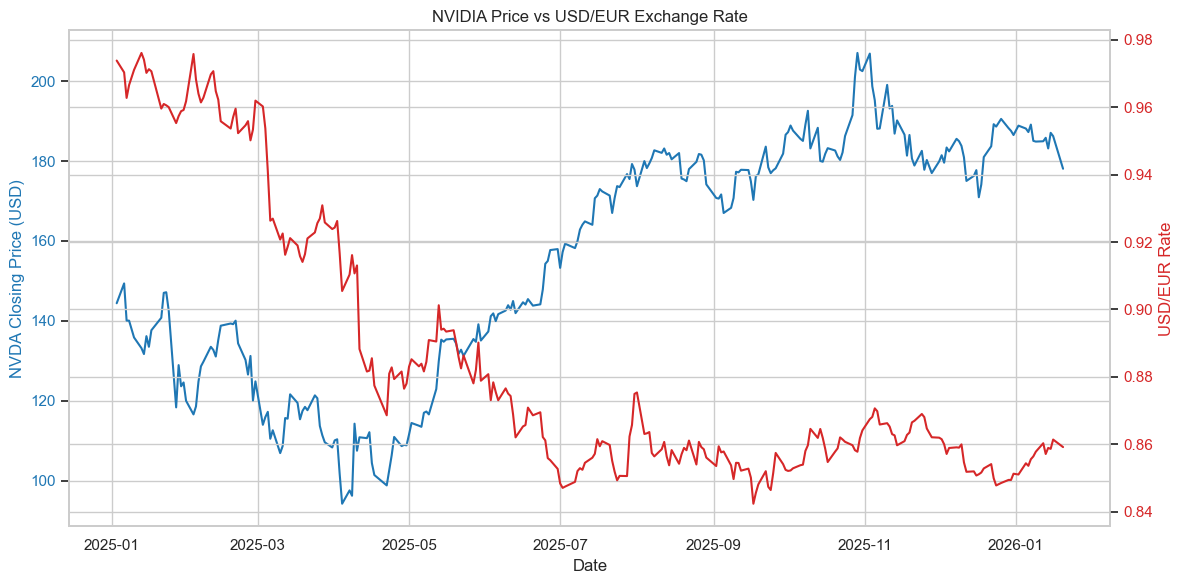

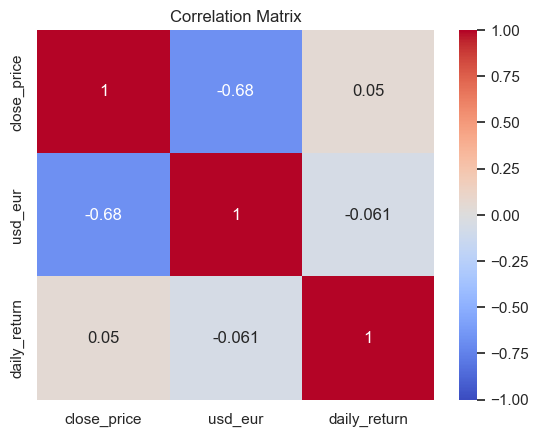

In [17]:
# Clean: Drop any rows with missing values
df_integrated = df_integrated.dropna()

print("Description after integration:")
display(df_integrated.describe())

# Dual axis plot: NVDA price vs USD/EUR
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.set_xlabel('Date')
ax1.set_ylabel('NVDA Closing Price (USD)', color='tab:blue')
ax1.plot(df_integrated['date'], df_integrated['close_price'], color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('USD/EUR Rate', color='tab:red')
ax2.plot(df_integrated['date'], df_integrated['usd_eur'], color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title('NVIDIA Price vs USD/EUR Exchange Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Correlation heatmap
corr = df_integrated[['close_price', 'usd_eur', 'daily_return']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

## 5. Comparison: NVDA vs S&P 500 Index (^GSPC)

Normalize prices to compare relative performance. 

[*********************100%***********************]  1 of 1 completed

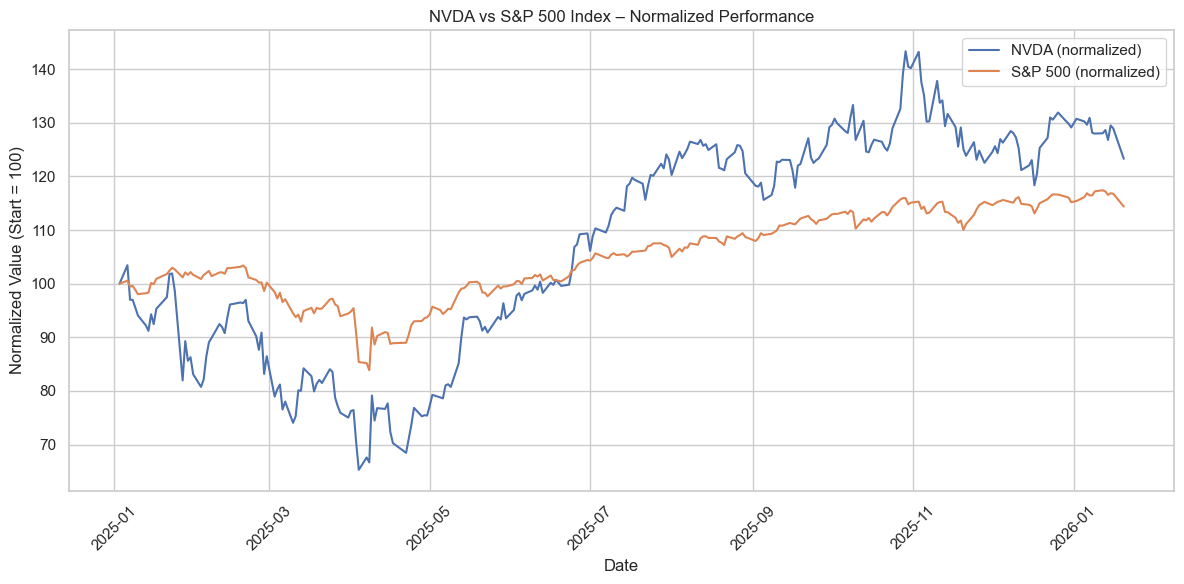

In [18]:
# Download S&P 500 index
sp500 = yf.download('^GSPC', start=start_date, end=end_date)['Close'].reset_index()
sp500.columns = ['date', 'sp500_close']

# Merge
df_integrated = pd.merge(df_integrated, sp500, on='date', how='inner')

# Normalize to start at 100
df_integrated['nvda_norm'] = df_integrated['close_price'] / df_integrated['close_price'].iloc[0] * 100
df_integrated['sp500_norm'] = df_integrated['sp500_close'] / df_integrated['sp500_close'].iloc[0] * 100

# Plot normalized comparison
plt.figure(figsize=(12, 6))
plt.plot(df_integrated['date'], df_integrated['nvda_norm'], label='NVDA (normalized)')
plt.plot(df_integrated['date'], df_integrated['sp500_norm'], label='S&P 500 (normalized)')
plt.title('NVDA vs S&P 500 Index – Normalized Performance')
plt.xlabel('Date')
plt.ylabel('Normalized Value (Start = 100)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Conclusions

- Focused on NVIDIA (NVDA), a leading S&P 500 stock driven by AI/semiconductor trends.
- Integrated USD/EUR exchange rate to evaluate currency impact for European investors.
- Key observations: [Add your insights here, e.g., "NVDA shows higher volatility than the S&P 500 index", "Moderate correlation with USD/EUR suggesting currency hedging could be useful"].
- Potential improvements: Add technical indicators (e.g., RSI, moving averages), compare with other S&P 500 stocks, or include news sentiment.